# INTERNSAVY

# Data Science Internship
# - Anisha Walde

# Task 1: Use classification technique for predicition of Graduate Admissions

**Objective:** To analyze a graduate admissions dataset, preprocess the data, train a classification model to predict admission outcomes, and provide comprehensive visualizations for data exploration and model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Dataset 
data = pd.read_csv('admission_data.csv')

In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
data.index

RangeIndex(start=0, stop=500, step=1)

In [6]:
data.shape

(500, 8)

In [7]:
data.size

4000

In [8]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Data Exploration and Visualization:

In [12]:
# Summary statistics
summary = data.describe()
print("\nSummary Statistics:")
print(summary)


Summary Statistics:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63

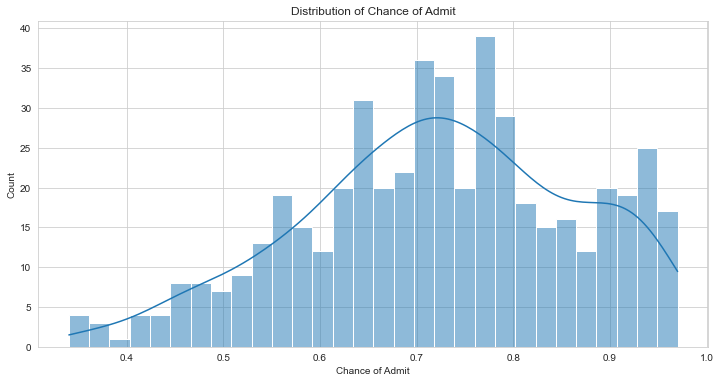

In [13]:
# Data distribution
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.histplot(data['Chance of Admit '], bins=30, kde=True)
plt.title("Distribution of Chance of Admit")
plt.xlabel("Chance of Admit")
plt.show()

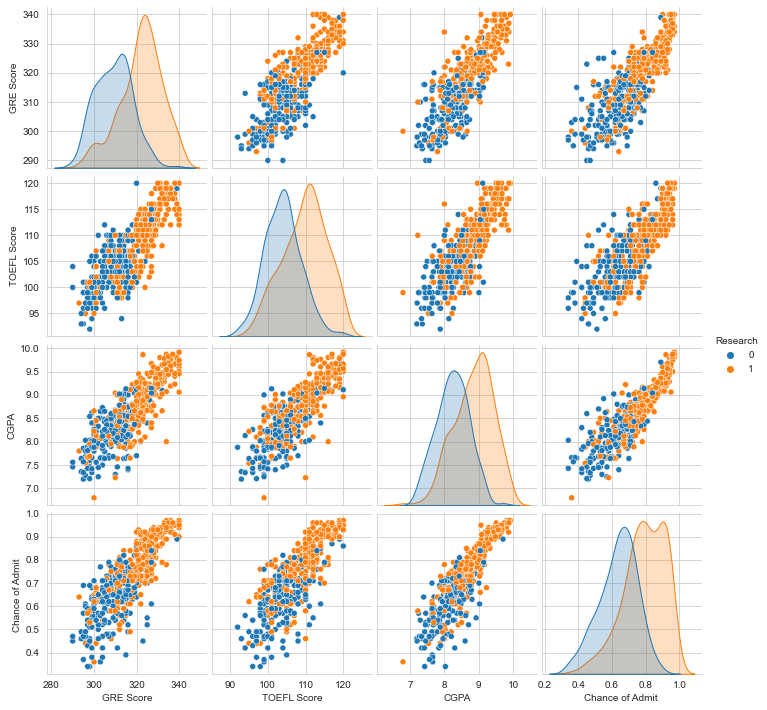

In [14]:
sns.pairplot(data, vars=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], hue='Research')
plt.show()

# Data Preprocessing:

In [15]:
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

In [16]:
X.head(8)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0


In [17]:
# Define a classification threshold (e.g., 0.7) 
threshold = 0.7
y = (y > threshold).astype(int)

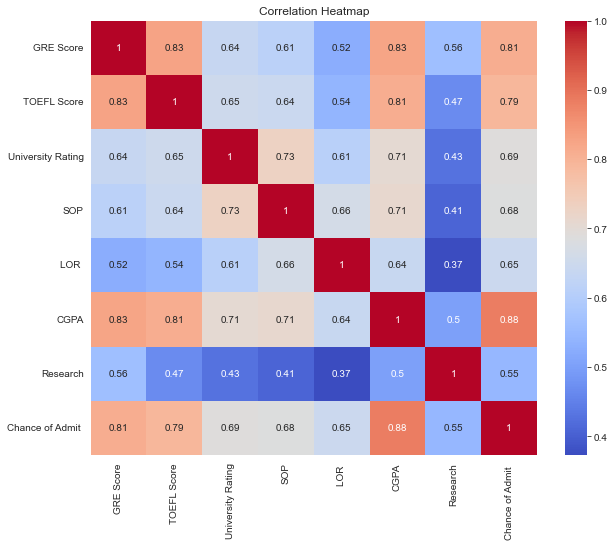

In [18]:
# Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

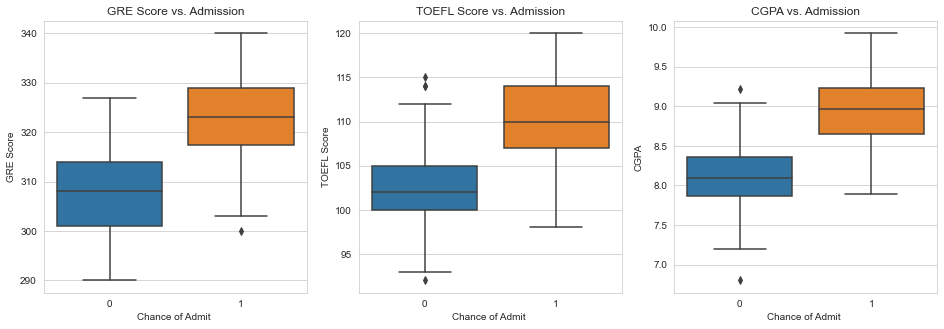

In [19]:
# Distributions of important features
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=y, y=data['GRE Score'])
plt.title("GRE Score vs. Admission")

plt.subplot(1, 3, 2)
sns.boxplot(x=y, y=data['TOEFL Score'])
plt.title("TOEFL Score vs. Admission")

plt.subplot(1, 3, 3)
sns.boxplot(x=y, y=data['CGPA'])
plt.title("CGPA vs. Admission")
plt.show()

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [22]:
y_train

249    1
433    1
19     0
322    1
332    1
      ..
106    1
270    1
348    0
435    0
102    0
Name: Chance of Admit , Length: 400, dtype: int32

In [23]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [24]:
y_test

361    1
73     1
374    0
155    1
104    1
      ..
347    0
86     1
75     1
438    0
15     0
Name: Chance of Admit , Length: 100, dtype: int32

In [25]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classification model:

In [26]:
clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions and evaluate the model:

In [27]:
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [28]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.86      0.86      0.86        51

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [29]:
# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[42  7]
 [ 7 44]]


In [30]:
# cross-validation
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cross_val_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

Mean Accuracy: 0.85
Standard Deviation: 0.02


**Thank You!**